In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
cars_flag = True
if cars_flag:
    src = '../cars/car.data'
    import warnings
    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
else:
    src = '../adult/data.txt'
data = pd.read_csv(src, index_col=0)

In [3]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
# Set data set specific settings for template

mappings = {}
cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'class']
if cars_flag:
    scoring = metrics.make_scorer(metrics.matthews_corrcoef)    
    for i in data.columns:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)
else:
    scoring = 'accuracy'    
    for i in cols:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)

In [6]:
mappings

{'buying': ['high', 'low', 'med', 'vhigh'],
 'class': ['acc', 'good', 'unacc', 'vgood'],
 'doors': ['2', '3', '4', '5more'],
 'lug_boot': ['big', 'med', 'small'],
 'maint': ['high', 'low', 'med', 'vhigh'],
 'persons': ['2', '4', 'more'],
 'safety': ['high', 'low', 'med']}

In [7]:
X = data.loc[:,data.columns != 'class']
y = data.iloc[:,-1]

In [8]:
print(X.shape)
print(y.shape)
X.head()

(1728, 6)
(1728,)


,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [9]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
from sklearn.svm import SVC

In [13]:
clf = SVC()
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [14]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10, scoring=scoring)
print(scoring)

/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


make_scorer(matthews_corrcoef)


In [15]:
train_scores_mean = np.mean(train_scores,axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

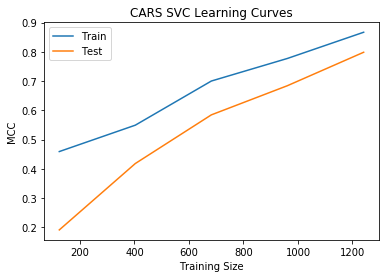

In [17]:
plt.title("CARS SVC Learning Curves")
plt.xlabel("Training Size")
plt.ylabel("MCC")
plt.plot(train_sizes, train_scores_mean, label="Train")
plt.plot(train_sizes, test_scores_mean, label="Test")
plt.legend(loc='best')

In [18]:
param_range = [0.5, 0.6, 0.7, 0.8, 0.9,1.0]
train_scores, test_scores = validation_curve(clf, X_train, y_train, 
                                             param_name='C', 
                                             param_range=param_range,
                                             cv=10,
                                             scoring=scoring)

In [19]:
train_scores_mean = np.mean(train_scores,axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

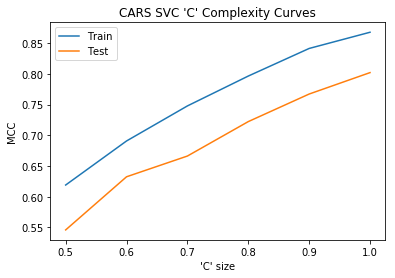

In [22]:
plt.title("CARS SVC 'C' Complexity Curves")
plt.xlabel("'C' size")
plt.ylabel("MCC")
plt.plot(param_range, train_scores_mean, label="Train")
plt.plot(param_range, test_scores_mean, label="Test")
plt.legend(loc='best')

In [23]:
clf = SVC()

In [24]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [25]:
y_pred = clf.predict(X_test)

In [26]:
print metrics.matthews_corrcoef(y_test, y_pred)

0.843106712388166
